
# **NYC Subway Ridership Data Analysis**

# **Description:** Analyzing NYC subway ridership trends from 2018-2023 and focusing on borough-level contributions and station rankings.




In [ ]:
!pip install hvplot
!pip install panel
!pip install jupyter_bokeh
!pip install panel hvplot pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


## ***Importing Required Libraries***

In [ ]:
#Importing Packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import panel as pn
import altair as alt
import hvplot.pandas


# PART 1: **Borough Wise Trend Analysis**

# It focuses on comparing ridership patterns for all the bouroughs from 2020-2024.

# ***Data Cleaning***

### Monthly Ridership Data (Since 2020)

In [ ]:
# Importing the data directly from the URL
monthly_riders_since_2020 = pd.read_csv('https://raw.githubusercontent.com/lavanyanagesh99/NYC_Subway_Ridership_Data_Analysis/refs/heads/main/MTA_Daily_Ridership_Data__Beginning_2020.csv')

# Extract only the relevant Subway data
subway_data = monthly_riders_since_2020[['Date', 'Subways: Total Estimated Ridership']]

# Rename columns for clarity
subway_data.rename(columns={'Date': 'Date',
                            'Subways: Total Estimated Ridership': 'Ridership'}, inplace=True)

# Convert the "Date" column to datetime
subway_data['Date'] = pd.to_datetime(subway_data['Date'])

# Extract year and month for analysis
subway_data['Year'] = subway_data['Date'].dt.year
subway_data['Month'] = subway_data['Date'].dt.month

# Filter out any data beyond January 2024
subway_data = subway_data[subway_data['Date'] < '2024-02-01']

# Rearrange columns for readability
subway_data = subway_data[['Date', 'Year', 'Month', 'Ridership']]


<ipython-input-3-9011c927def2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_data.rename(columns={'Date': 'Date',
<ipython-input-3-9011c927def2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_data['Date'] = pd.to_datetime(subway_data['Date'])
<ipython-input-3-9011c927def2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
# Display the processed Subway data
subway_data.head()

,Date,Year,Month,Ridership
0,2021-01-01,2021,1,613692
1,2022-01-01,2022,1,1027918
2,2023-01-01,2023,1,1675507
3,2024-01-01,2024,1,1648734
4,2021-01-02,2021,1,988418


In [ ]:
# Display basic info about the data
print("Monthly Ridership Data Information:")
print(subway_data.info())
print("\nMonthly Ridership Summary Statistics:")
print(subway_data.describe())

Monthly Ridership Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 0 to 1726
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1432 non-null   datetime64[ns]
 1   Year       1432 non-null   int32         
 2   Month      1432 non-null   int32         
 3   Ridership  1432 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 44.8 KB
None

Monthly Ridership Summary Statistics:
                      Date         Year        Month     Ridership
count                 1432  1432.000000  1432.000000  1.432000e+03
mean   2022-02-14 12:00:00  2021.615922     6.614525  2.363367e+06
min    2020-03-01 00:00:00  2020.000000     1.000000  1.983990e+05
25%    2021-02-21 18:00:00  2021.000000     4.000000  1.626684e+06
50%    2022-02-14 12:00:00  2022.000000     7.000000  2.282564e+06
75%    2023-02-07 06:00:00  2023.000000    10.000000  3.292559e+06



### Total Ridership Data (Since 2018)


In [ ]:
# Load the Excel file
total_ridership_since_2018 = pd.read_excel('https://raw.githubusercontent.com/lavanyanagesh99/NYC_Subway_Ridership_Data_Analysis/main/2023_Subway_Tables.xlsx')


# Rework data header and columns
total_ridership_since_2018.columns = total_ridership_since_2018.iloc[0]  # Set the first row as header
total_ridership_since_2018 = total_ridership_since_2018[1:]  # Drop the first row (new header row)

## Rename columns for clarity
total_ridership_since_2018.columns = [
    'station_name', '*', 'borough', 'total_ridership_2018', 'total_ridership_2019',
    'total_ridership_2020', 'total_ridership_2021', 'total_ridership_2022',
    'total_ridership_2023', '2022_2023_change', 'extra_col', '2023_ridership_rank'
]

# Drop unnecessary columns, such as '*' and 'extra_col'
total_ridership_since_2018 = total_ridership_since_2018.drop(columns=['*', 'extra_col'])

# Drop rows with missing borough values
total_ridership_since_2018.dropna(subset=['borough'], inplace=True)

# Replace borough codes with full names
replacements = {
    'Bx': 'The Bronx',
    'Q': 'Queens',
    'B': 'Brooklyn',
    'M': 'Manhattan'
}
total_ridership_since_2018['borough'] = total_ridership_since_2018['borough'].replace(replacements)

# Convert numeric columns to appropriate data types
numeric_columns = [
    'total_ridership_2018', 'total_ridership_2019', 'total_ridership_2020',
    'total_ridership_2021', 'total_ridership_2022', 'total_ridership_2023',
    '2022_2023_change', '2023_ridership_rank'
]
for col in numeric_columns:
    total_ridership_since_2018[col] = pd.to_numeric(total_ridership_since_2018[col], errors='coerce')


In [ ]:
# Display information about the dataset
print(total_ridership_since_2018.info())

# Display summary statistics for the dataset
summary_statistics = total_ridership_since_2018.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 2 to 427
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   station_name          423 non-null    object 
 1   borough               423 non-null    object 
 2   total_ridership_2018  423 non-null    float64
 3   total_ridership_2019  423 non-null    float64
 4   total_ridership_2020  423 non-null    float64
 5   total_ridership_2021  423 non-null    float64
 6   total_ridership_2022  423 non-null    float64
 7   total_ridership_2023  423 non-null    float64
 8   2022_2023_change      423 non-null    float64
 9   2023_ridership_rank   423 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 36.4+ KB
None


In [ ]:
# Ensuring the dataset is correctly formatted and numeric columns are intact
numeric_columns = [
    'total_ridership_2018', 'total_ridership_2019', 'total_ridership_2020',
    'total_ridership_2021', 'total_ridership_2022', 'total_ridership_2023',
    '2022_2023_change', '2023_ridership_rank'
]
for col in numeric_columns:
    total_ridership_since_2018[col] = pd.to_numeric(total_ridership_since_2018[col], errors='coerce')


## **Data Visualization**
### 1. Borough-Wise Ridership Trends Over Time

In [ ]:
fig = go.Figure()
years = ['2018', '2019', '2020', '2021', '2022', '2023']
for borough in total_ridership_since_2018['borough'].unique():
    borough_data = total_ridership_since_2018[total_ridership_since_2018['borough'] == borough]
    avg_ridership = borough_data[
        ['total_ridership_2018', 'total_ridership_2019', 'total_ridership_2020',
         'total_ridership_2021', 'total_ridership_2022', 'total_ridership_2023']
    ].mean()
    fig.add_trace(go.Scatter(
        x=years, y=avg_ridership, mode='lines+markers', name=borough,
        marker=dict(size=8), line=dict(width=2)
    ))
fig.update_layout(
    title="Average Ridership Trends Over Time by Borough",
    xaxis_title="Year", yaxis_title="Average Ridership",
    legend_title="Borough", template="plotly_white"
)
fig.show()


### 2. Borough-Wise Contribution to Total Ridership (2023)

In [ ]:
# Group the data by borough and calculate total ridership
borough_totals = total_ridership_since_2018.groupby('borough')['total_ridership_2023'].sum().reset_index()

# Create a bar chart using Plotly Express
fig_bar = px.bar(
    borough_totals,
    x='borough',
    y='total_ridership_2023',
    title="Borough-Wise Contribution to Total Ridership (2023)",
    labels={'borough': 'Borough', 'total_ridership_2023': 'Total Ridership'},
    color='borough',
    color_discrete_sequence=px.colors.qualitative.Set2,  # Consistent color scheme
    text='total_ridership_2023'  # Show values on bars
)

# Update layout for better readability
fig_bar.update_layout(
    xaxis_title="Borough",
    yaxis_title="Total Ridership",
    template="plotly_white"
)

# Show the bar chart
fig_bar.show()



### 3. Heatmap of Yearly Ridership Trends

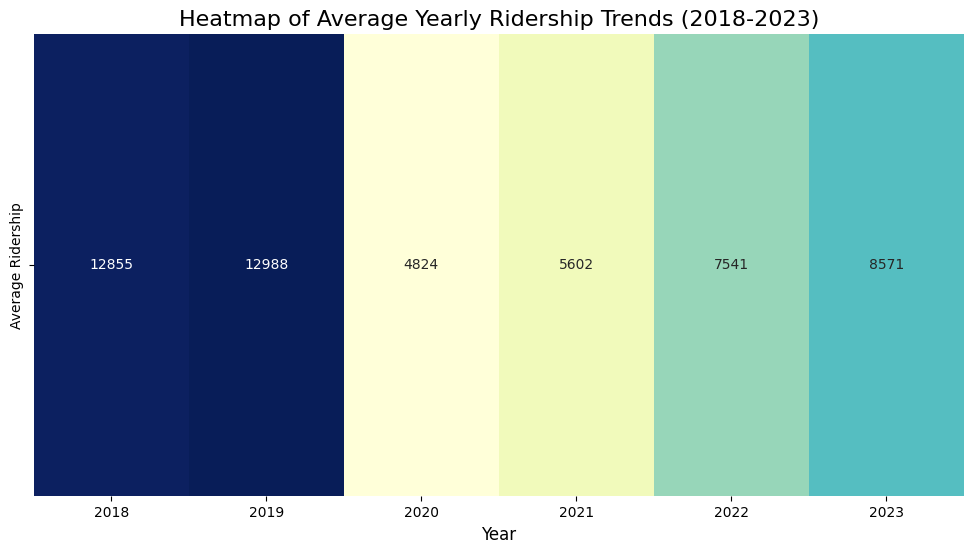

In [ ]:
plt.figure(figsize=(12, 6))
heatmap_data = total_ridership_since_2018[
    ['total_ridership_2018', 'total_ridership_2019', 'total_ridership_2020',
     'total_ridership_2021', 'total_ridership_2022', 'total_ridership_2023']
].mean().reset_index()
heatmap_data.columns = ['Year', 'Average Ridership']
heatmap_data['Year'] = heatmap_data['Year'].str.extract('(\d+)').astype(int)

sns.heatmap(
    heatmap_data.pivot_table(index=None, columns='Year', values='Average Ridership'),
    annot=True, fmt=".0f", cmap='YlGnBu', cbar=False
)
plt.title("Heatmap of Average Yearly Ridership Trends (2018-2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("")
plt.show()


### 4. Yearly Ridership Comparison
#### Aggregate data by year and month to observe seasonal patterns

In [ ]:
monthly_avg = subway_data.groupby(['Year', 'Month']).mean().reset_index()

fig = px.line(
    monthly_avg,
    x='Month', y='Ridership', color='Year',
    title="Yearly Ridership Trends by Month",
    labels={"Ridership": "Average Monthly Ridership", "Month": "Month"},
    template="plotly_white"
)
fig.update_traces(line=dict(width=2))
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),
    yaxis_title="Average Ridership",
    xaxis_title="Month",
    hovermode="x unified"
)
fig.show()

# Part 2 : **NYC Subway Ridership Analysis**

## First section representing a line chart showing trends in ridership over time.
## Second section focuses on analyzing hourly ridership and identifying the busiest subway stations.
### It uses **Panel** and **hvPlot** to create an interactive app for exploring these metrics.

In [ ]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/lavanyanagesh99/NYC_Subway_Ridership_Data_Analysis/refs/heads/main/MTA_Daily_Ridership_Data__Beginning_2020.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [ ]:
# Define widgets for user interaction
mode_of_transport = pn.widgets.Select(
    name='Transport Mode',
    options=[
        'Subways', 'Buses', 'LIRR', 'Metro-North',
        'Access-A-Ride', 'Bridges and Tunnels', 'Staten Island Railway'
    ]
)
metric = pn.widgets.Select(
    name='Metric',
    options=[
        'Total Estimated Ridership', '% of Comparable Pre-Pandemic Day'
    ]
)
date_range_slider = pn.widgets.DateRangeSlider(
    name='Select Date Range',
    start=data['Date'].min(),
    end=data['Date'].max()
)

#Defining the Data Filtering and Plotting Function

@pn.depends(mode_of_transport, metric, date_range_slider)
def plot_data(transport, selected_metric, date_range):
    metric_column = f"{transport}: {selected_metric}"
    filtered_data = data[(data['Date'] >= date_range[0]) & (data['Date'] <= date_range[1])]
    return filtered_data.hvplot.line(
        x='Date', y=metric_column,
        title=f'{transport} {selected_metric} Over Time'
    ).opts(
        yformatter='%.0f'  # Format the y-axis to show numbers without scientific notation
    )


#Layout and Display of the Interactive Panel App

app = pn.Column(
    pn.Row(mode_of_transport, metric, date_range_slider),
    plot_data
)

# Display the app inside the notebook
app

Column
    [0] Row
        [0] Select(name='Transport Mode', options=['Subways', 'Buses', ...], value='Subways')
        [1] Select(name='Metric', options=['Total Estimated Ridershi...], value='Total Estimated R...)
        [2] DateRangeSlider(end=Timestamp('2024-11-21 0..., name='Select Date Range', start=Timestamp('2020-03-01 0..., value=(Timestamp('2020-03-01 00:..., value_end=Timestamp('2024-11-21 0..., value_start=Timestamp('2020-03-01 0...)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

## Widget for busiest stations

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lavanyanagesh99/NYC_Subway_Ridership_Data_Analysis/refs/heads/main/nyc_subway_data.csv')

# Parse datetime information
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
df['date'] = df['transit_timestamp'].dt.date
df['hour'] = df['transit_timestamp'].dt.hour
df['day_of_week'] = df['transit_timestamp'].dt.day_name()
df['month'] = df['transit_timestamp'].dt.month_name()

# Convert ridership to numeric type
df['ridership'] = pd.to_numeric(df['ridership'], errors='coerce').astype(int)

# Creating Aggregated Metrics for Visualizations

# Top 10 busiest stations
top_stations = df.groupby('station_complex')['ridership'].sum().nlargest(10).reset_index()

# Ridership by day of the week
daily_ridership = df.groupby('day_of_week')['ridership'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Ridership by hour of the day
hourly_ridership = df.groupby('hour')['ridership'].sum().reset_index()

# Ridership time series
time_series = df.groupby('date')['ridership'].sum().reset_index()

#Initializing Panel and Defining Widgets
pn.extension()

# Define a widget for metric selection
metric_selector = pn.widgets.RadioButtonGroup(
    name='Metric',
    options=['Top 10 Stations', 'Hourly Ridership'],
    value='Top 10 Stations'  # Default selection
)

#Creating the Visualization Function

@pn.depends(metric_selector.param.value)
def create_chart(selected_metric):
    if selected_metric == 'Top 10 Stations':
        # Bar chart for top 10 busiest stations
        return top_stations.hvplot.bar(
            x='station_complex',
            y='ridership',
            title='Top 10 Busiest Subway Stations',
            xlabel='Station Complex',
            ylabel='Total Ridership',
            height=400,
            width=700,
            color='steelblue'
        )
    elif selected_metric == 'Hourly Ridership':
        # Line chart for hourly ridership
        return hourly_ridership.hvplot.line(
            x='hour',
            y='ridership',
            title='Ridership by Hour of the Day',
            xlabel='Hour of Day',
            ylabel='Total Ridership',
            height=400,
            width=700,
            color='darkorange'
        ).opts(
            tools=['hover']
        )

#Building the Panel Layout

app = pn.Column(
    "## NYC Subway Ridership Analysis",
    metric_selector,
    create_chart
)


# Displaying or Serving the App
app

Column
    [0] Markdown(str)
    [1] RadioButtonGroup(name='Metric', options=['Top 10 Stations', ...], value='Top 10 Stations')
    [2] ParamFunction(function, _pane=HoloViews, defer_load=False)

# Part 3: **Pre-Pandemic vs. Current Ridership Analysis**

## It focuses on comparing ridership patterns for Manhattan's top subway stations using **Altair** and **Panel**.

In [ ]:
# Initialize Panel extension
pn.extension('vega')

# Loading and Filtering the Dataset
data = pd.read_excel('https://github.com/lavanyanagesh99/NYC_Subway_Ridership_Data_Analysis/raw/main/NYC_Subway_Usage_Data_Level.xlsx', engine='openpyxl')

# Convert period column to datetime
data['period'] = pd.to_datetime(data['period'], format='%m/%d/%y')

# Filter for Manhattan subway stations based on latitude and longitude
data = data[
    (data['latitude'] >= 40.4774) & (data['latitude'] <= 40.9176) &
    (data['longitude'] >= -74.0200) & (data['longitude'] <= -73.9300)
].dropna(subset=['baseline_usage (Pre-pandemic)', 'current_usage'])

#Preparing Data for Visualization
# Group data by station and period, then calculate the mean
grouped_data = data.groupby(['station', 'period']).mean().reset_index()

# Find the top 5 stations with the highest current usage
top_5 = grouped_data.groupby('station')['current_usage'].mean().nlargest(5).index

# Filter data for the top 5 stations
top_5_data = grouped_data[grouped_data['station'].isin(top_5)]

#Creating the Visualization Function
def plot_usage(subway_line):
    subway_data = top_5_data[top_5_data['station'] == subway_line]

    # Pre-pandemic usage plot
    pre_pandemic_chart = alt.Chart(subway_data).mark_line().encode(
        x=alt.X('period:T', axis=alt.Axis(title='Date')),  # Temporal x-axis
        y=alt.Y('baseline_usage (Pre-pandemic):Q', axis=alt.Axis(title='Ridership')),  # Quantitative y-axis
        color=alt.value('red'),
    ).properties(
        title=f'Pre-Pandemic Ridership for: {subway_line}',
        width=800,
        height=300
    ).interactive()

    # Current (Post-pandemic) usage chart
    current_usage_chart = alt.Chart(subway_data).mark_line().encode(
        x=alt.X('period:T', axis=alt.Axis(title='Date')),
        y=alt.Y('current_usage:Q', axis=alt.Axis(title='Ridership')),
        color=alt.value('blue'),
    ).properties(
        title=f'Post-Pandemic Ridership for: {subway_line}',
        width=800,
        height=300
    ).interactive()

    return pre_pandemic_chart + current_usage_chart

#5. Creating the Interactive Panel App
# Dropdown widget to select subway lines
subway_widget = pn.widgets.Select(
    name='Select Subway Line',
    options=list(top_5),
    value=top_5[0]  # Default to the first top station
)

# Bind the plot function to the widget
interactive_plot = pn.bind(plot_usage, subway_line=subway_widget)

# Layout of the Panel App
manhattan_app = pn.Column(
    "### Compare Pre-Pandemic vs. Current Ridership by Daniella Benyamini",
    subway_widget,
    interactive_plot
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


In [ ]:
#Displaying the App
manhattan_app.servable()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


Column
    [0] Markdown(str)
    [1] Select(options=['42 St Stations-Bryant Pk...], value='42 St Stations-Bryant Pk-...)
    [2] ParamFunction(function, _pane=Vega, defer_load=False)